In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLarsCV, RANSACRegressor, ElasticNet, Lasso, SGDClassifier,ARDRegression, HuberRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import HistGradientBoostingRegressor,BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [17]:
data = pd.read_csv('/content/ipl_data.csv')

In [18]:
data.drop(['mid'], axis =1, inplace = True)

In [19]:
data['date'] = data['date'].astype(np.datetime64)


In [20]:
data

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [22]:
data.drop(['date'], axis =1, inplace = True)

In [21]:
data['year'] =data.date.dt.year

In [23]:
X= data.drop(['total'], axis =1)
y = data.total

In [24]:
X.isna().sum()

venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
year              0
dtype: int64

In [25]:
def remove_outliers(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)

    return print('These outliers have been removed from your dataset: \n\n', outliers,
                'New shape is:', df.shape)

In [27]:
X.drop(['batsman','bowler'],axis =1, inplace = True)

In [29]:
X

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,year
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,2008
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,2008
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,2008
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,2008
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,2017
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,2017
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,2017
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,2017


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV



rfr = RandomForestRegressor(random_state=1)
rfecv = RFECV(estimator=rfr, step=1, cv=10, scoring='neg_mean_squared_error')

rfecv.fit(X.select_dtypes(exclude="object"), y)


RFECV(cv=10, estimator=RandomForestRegressor(random_state=1),
      scoring='neg_mean_squared_error')

In [31]:
print('Optimal Number of features is : {}'.format(rfecv.n_features_))


Optimal Number of features is : 8


In [32]:
print(np.where(rfecv.support_ == False)[0])


[]


In [33]:
X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis =1 ,inplace=True)


In [34]:
X

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,year
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,0,0,2008
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,0,0,2008
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,0,0,2008
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,0,0,2008
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,19.2,40,0,40,12,2017
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,19.3,46,0,46,12,2017
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,19.4,47,0,47,12,2017
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,19.5,48,0,47,13,2017


In [35]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features = correlation(X.select_dtypes(exclude="object"), 0.8)
len(set(corr_features))

1

In [37]:
X.drop(corr_features,axis=1, inplace = True)


In [38]:
X

,venue,bat_team,bowl_team,runs,wickets,runs_last_5,wickets_last_5,striker,non-striker,year
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,1,0,0,0,2008
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,1,0,0,0,2008
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,2,0,0,0,2008
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,2,0,0,0,2008
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,2,0,0,0,2008
...,...,...,...,...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,121,7,40,0,40,12,2017
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,127,7,46,0,46,12,2017
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,128,7,47,0,47,12,2017
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,129,7,48,0,47,13,2017


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np
from tqdm import tqdm

from sklearn.linear_model import BayesianRidge, HuberRegressor, PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [40]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

In [41]:
num_features = X.select_dtypes(exclude="object")
cat_features = X.select_dtypes(include="object")

In [42]:
num_features

,runs,wickets,runs_last_5,wickets_last_5,striker,non-striker,year
0,1,0,1,0,0,0,2008
1,1,0,1,0,0,0,2008
2,2,0,2,0,0,0,2008
3,2,0,2,0,0,0,2008
4,2,0,2,0,0,0,2008
...,...,...,...,...,...,...,...
76009,121,7,40,0,40,12,2017
76010,127,7,46,0,46,12,2017
76011,128,7,47,0,47,12,2017
76012,129,7,48,0,47,13,2017


In [43]:
step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder( sparse = False,drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', MinMaxScaler(feature_range=(0,1
                                               )), num_features.columns)
    ],
    remainder='passthrough'
)


In [44]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return r2, adj_r2, mse, mae

# Initialize different regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'MLP Regressor': MLPRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'LightGBM Regressor': LGBMRegressor(),

}

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers, tablefmt="grid"))

  0%|          | 0/18 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
  6%|▌         | 1/18 [00:00<00:07,  2.31it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
 11%|█         | 2/18 [00:00<00:05,  3.03it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
 17%|█▋        | 3/18 [00:00<00:04,  3.27it/s]/usr/local/lib

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 60811, number of used features: 67
[LightGBM] [Info] Start training from score 160.855651


100%|██████████| 18/18 [10:27<00:00, 34.87s/it]

+-------------------------------+-------------+----------------------+----------------------+-----------------------+
| Model                         |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |
+===============================+=============+======================+======================+=======================+
| Linear Regression             |   0.499649  |             0.499319 |            429.741   |             15.8226   |
+-------------------------------+-------------+----------------------+----------------------+-----------------------+
| Ridge Regression              |   0.499634  |             0.499304 |            429.754   |             15.8216   |
+-------------------------------+-------------+----------------------+----------------------+-----------------------+
| Lasso Regression              |   0.279046  |             0.278571 |            619.212   |             19.1995   |
+-------------------------------+-------------+---------

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


+-------------------------+-------------+----------------------+----------------------+-----------------------+
| Model                   |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |
+=========================+=============+======================+======================+=======================+
| Decision Tree Regressor |    0.943532 |             0.943495 |              48.4992 |               1.39864 |
+-------------------------+-------------+----------------------+----------------------+-----------------------+


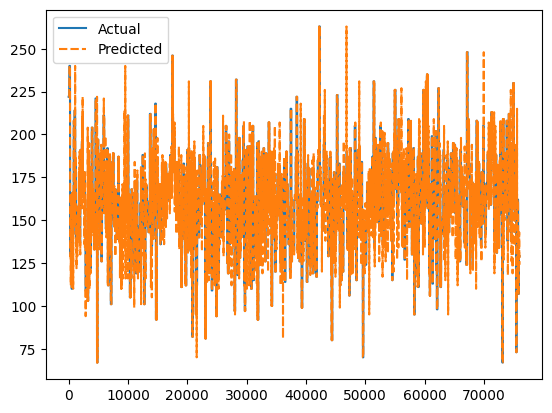

In [49]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})

    sns.lineplot(data= diff)

    return r2, adj_r2, mse, mae

# Initialize different regression models
regression_models = {

    'Decision Tree Regressor': DecisionTreeRegressor(),
}

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error"]
print(tabulate(results, headers, tablefmt="grid"))

In [50]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [56]:
X_encoded = pd.get_dummies(X_train, columns=cat_features.columns)


In [57]:
X_encoded

,runs,wickets,runs_last_5,wickets_last_5,striker,non-striker,year,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,...,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiant,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
72007,31,1,31,1,16,11,2017,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10361,22,2,22,2,10,2,2009,0,0,0,...,0,0,0,0,0,1,0,0,0,0
34975,57,1,49,1,23,18,2012,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71227,144,5,47,2,64,0,2017,0,0,0,...,1,0,0,0,0,0,0,0,0,0
55898,58,1,32,1,10,9,2015,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,173,4,55,1,42,9,2010,0,0,0,...,0,0,0,0,0,0,0,0,1,0
71934,85,2,30,2,29,1,2017,0,0,0,...,0,0,0,0,0,0,1,0,0,0
53649,23,0,23,0,17,5,2014,0,0,0,...,0,0,0,1,0,0,0,0,0,0
42681,81,4,28,1,44,6,2013,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
folds = KFold(n_splits = 5, shuffle = True, random_state = None)
scores = cross_val_score(model, X_encoded, y_train, scoring='r2', cv=folds)
scores

array([0.93583388, 0.93110887, 0.92460005, 0.92082092, 0.91775073])

In [68]:
X_encoded

,runs,wickets,runs_last_5,wickets_last_5,striker,non-striker,year,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,...,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiant,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
72007,31,1,31,1,16,11,2017,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10361,22,2,22,2,10,2,2009,0,0,0,...,0,0,0,0,0,1,0,0,0,0
34975,57,1,49,1,23,18,2012,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71227,144,5,47,2,64,0,2017,0,0,0,...,1,0,0,0,0,0,0,0,0,0
55898,58,1,32,1,10,9,2015,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17461,173,4,55,1,42,9,2010,0,0,0,...,0,0,0,0,0,0,0,0,1,0
71934,85,2,30,2,29,1,2017,0,0,0,...,0,0,0,0,0,0,1,0,0,0
53649,23,0,23,0,17,5,2014,0,0,0,...,0,0,0,1,0,0,0,0,0,0
42681,81,4,28,1,44,6,2013,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X_train

,venue,bat_team,bowl_team,runs,wickets,runs_last_5,wickets_last_5,striker,non-striker,year
72007,Saurashtra Cricket Association Stadium,Kings XI Punjab,Gujarat Lions,31,1,31,1,16,11,2017
10361,SuperSport Park,Royal Challengers Bangalore,Rajasthan Royals,22,2,22,2,10,2,2009
34975,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Deccan Chargers,57,1,49,1,23,18,2012
71227,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Kings XI Punjab,144,5,47,2,64,0,2017
55898,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,58,1,32,1,10,9,2015
...,...,...,...,...,...,...,...,...,...,...
17461,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Royal Challengers Bangalore,173,4,55,1,42,9,2010
71934,Maharashtra Cricket Association Stadium,Sunrisers Hyderabad,Rising Pune Supergiant,85,2,30,2,29,1,2017
53649,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,23,0,23,0,17,5,2014
42681,"MA Chidambaram Stadium, Chepauk",Sunrisers Hyderabad,Chennai Super Kings,81,4,28,1,44,6,2013
